# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [12]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.4 pandas==2.0.3 matplotlib==3.9.0 seaborn==0.13.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [13]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [14]:
# mount the google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# read the data from csv and copy that into df
origianlData = pd.read_csv('/content/drive/MyDrive/great-learning-materials/project1-python-foundations-food-hub/foodhub_order.csv')
df = origianlData.copy()

In [16]:
# Get the top 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [17]:
# Rows and Columns
df.shape

(1898, 9)

## Observations:

**Number of Rows:** 1898,

**Number of Columns:** 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [18]:
# structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


## Observations:
- There are a total of 9 columns in the DataFrame.
- Each column has a non-null count of 1898, indicating there may be no missing values in any column.
- The columns are as follows:
  - `order_id` (int64): A unique identifier for each order.
  - `customer_id` (int64): A unique identifier for each customer.
  - `restaurant_name` (object): The name of the restaurant, a string value.
  - `cuisine_type` (object): The type of cuisine offered, a string value.
  - `cost_of_the_order` (float64): The cost associated with each order, a decimal value.
  - `day_of_the_week` (object): The day on which the order was placed, a string value.
  - `rating` (object): The customer's rating for the order, a string that should probably be numerical or categorical.
  - `food_preparation_time` (int64): The time taken to prepare the food, an integer that may be converted to a float if seconds need to be captured.
  - `delivery_time` (int64): The time taken for the order to be delivered, another integer that may be a float for more precision.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [19]:
# Finding the missing (null) values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

## Observations:
There are no missing values in the data to treat.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [20]:
# Describe about all columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


## Observations:
Minimum Preparation Time: 20 minutes (min).

Average Preparation Time: 27.37 minutes (mean).

Maximum Preparation Time: 35 minutes (max).

### **Question 5:** How many orders are not rated? [1 mark]

In [21]:
# Orders that are not rated
df.loc[df["rating"] == 'Not given'].shape[0]

736

## Observations:

First checked the unique values of all rating using `df["rating"].unique()` which returned the array with 'Not given'. Used that string to figure out the number of orders that are not rated.

**Total orders not rated** : 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

# Observation on Orders

In [22]:
# Total number of unique orders.
df['order_id'].nunique()

1898

- There are 1898 orders.

# Observation on Customers

In [23]:
# Total number of unique customers.
df['customer_id'].nunique()

1200

In [24]:
# Number of repeated order customers
order_counts = df['customer_id'].value_counts()
repeat_Customers = order_counts[order_counts>1]
repeat_Customers.count()

416

- Out of 1200 customers, 416 customers repeated the orders more than once.
- 65.33% Customers placed the order only once.

# Observation on Restaurants

In [25]:
# number of unique restaurants in the dataset
df['restaurant_name'].nunique()

178

- 178 unique restaurants in the order data frame.

## Observations on cuisine_type

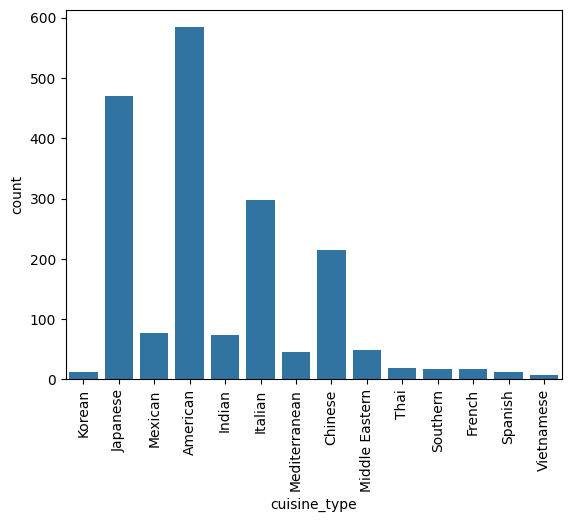

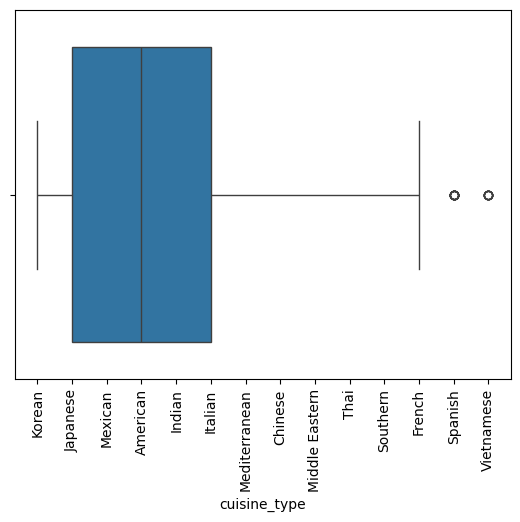

In [26]:
#countplot and box plot on cuisine type
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

- American cusine are ordered the most, followed by Japanese, Italian and then Chinese.
- Spanish and Vietnamese orders are the outliers.


# Observation on cost_of_the_order.



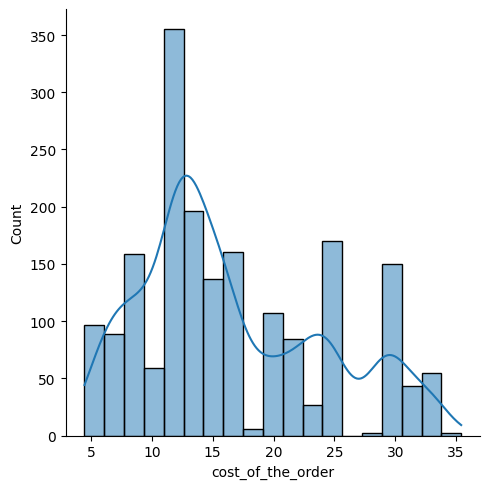

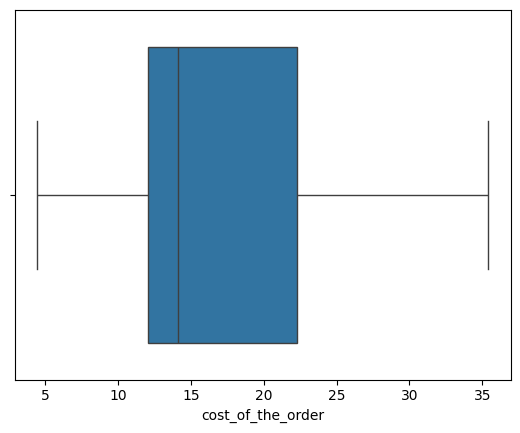

In [ ]:
# displot and box plots on the cost of the order
sns.displot(data=df['cost_of_the_order'], kde=True)
plt.show()

sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

- Highest number of orders are between 11 and 13 cost (approximately)
- Cost of orders are right skewed.
- No outliers on the cost.

# Observations on the day_of_the_week.

<Axes: xlabel='day_of_the_week', ylabel='count'>

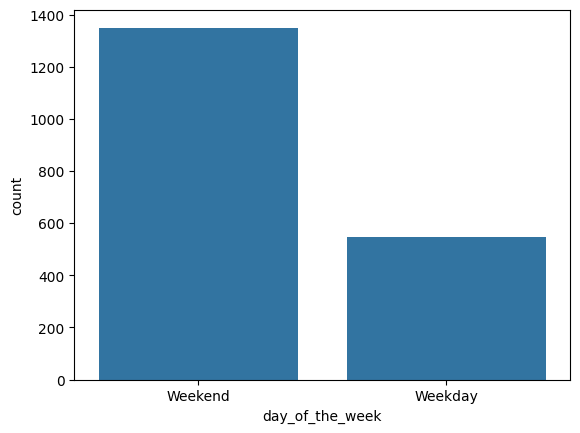

In [ ]:
# count plot on the day of the week.
sns.countplot(data=df, x='day_of_the_week')

- Number of orders are high during the week end than week days.

# Observations on Customer_ID.

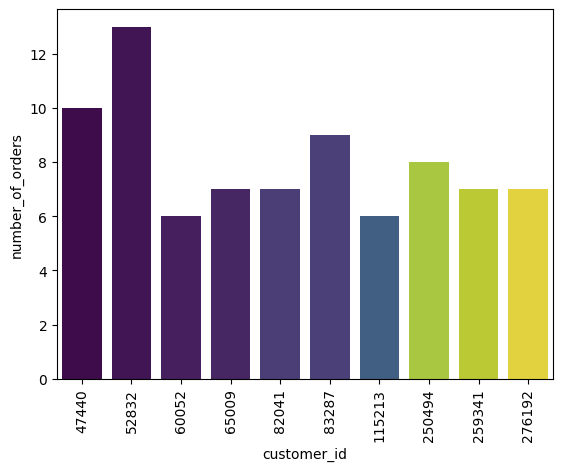

In [ ]:
# Group by 'customer_id' and count the number of orders for each customer
order_counts = df.groupby('customer_id').size()

# Sort the counts in descending order to see the customers with the most orders
order_counts_sorted = order_counts.sort_values(ascending=False)

# plot Top 10 customers ordered most.
top_customers_df = order_counts_sorted.head(10).reset_index()
top_customers_df.columns = ['customer_id', 'number_of_orders']
sns.barplot(x='customer_id', y='number_of_orders', hue='customer_id', data=top_customers_df, palette = 'viridis', legend=False)
plt.xticks(rotation=90)
plt.show()


- Customer 52832 ordered the most followed by 47440 Customer.

# Observations on restaurant_name

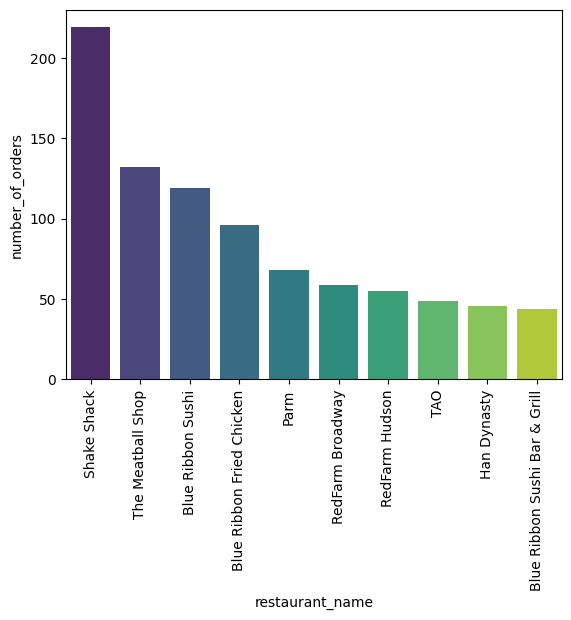

In [ ]:
# Group by 'restaurant_name' and count the number of orders for each restaurant
order_counts = df.groupby('restaurant_name').size()

# Sort the counts in descending order to see the restaurants with the most orders
order_counts_sorted = order_counts.sort_values(ascending=False)

# plot Top 10 restaurants ordered most.
top_restaurants_df = order_counts_sorted.head(10).reset_index()
top_restaurants_df.columns = ['restaurant_name', 'number_of_orders']
sns.barplot(x='restaurant_name', y='number_of_orders', hue='restaurant_name', data=top_restaurants_df, palette = 'viridis', legend=False)
plt.xticks(rotation=90)
plt.show()

# Observations on the Rating

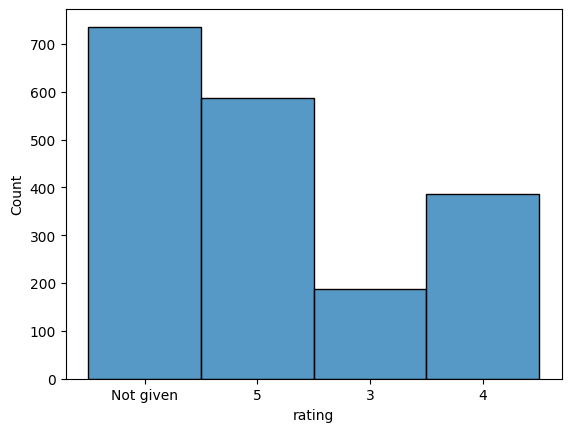

In [ ]:
#histogram plot on the rating
sns.histplot(data=df['rating'])
plt.show()

- More than 700 orders have not been rated.
- Among the ratings given, a smaller number of orders received a 3 rating.
- There were no ratings of 1 or 2.

# Observations on food_preparation_time

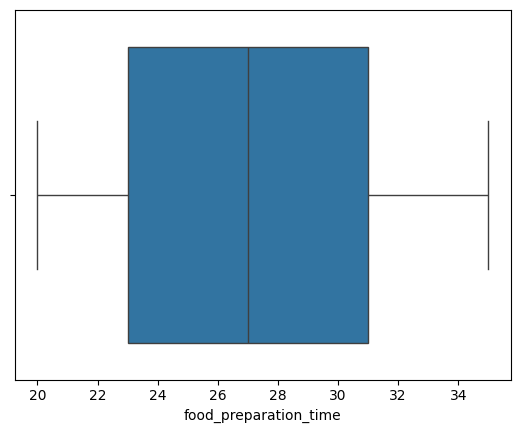

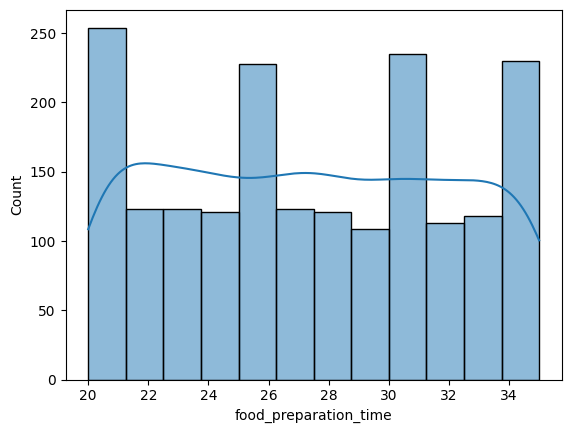

In [ ]:
#box plot and histogram on the food preparation time.
sns.boxplot(data = df, x='food_preparation_time')
plt.show()

sns.histplot(df['food_preparation_time'], kde=True)
plt.show()

- There are no outliers on the food preparation time.
- Most of the food preparation time stays between 21 - 33 mins (approximately)
- Uniform distribution

# Observations on delivery_time

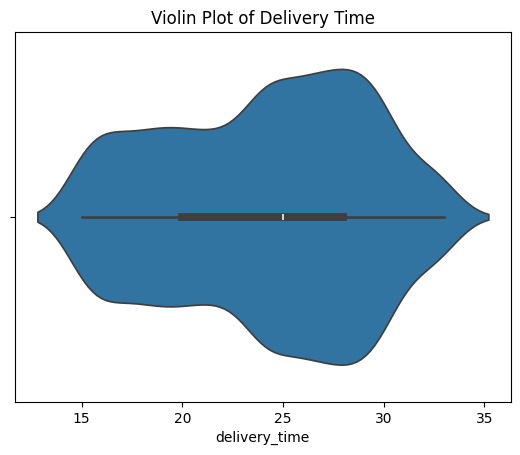

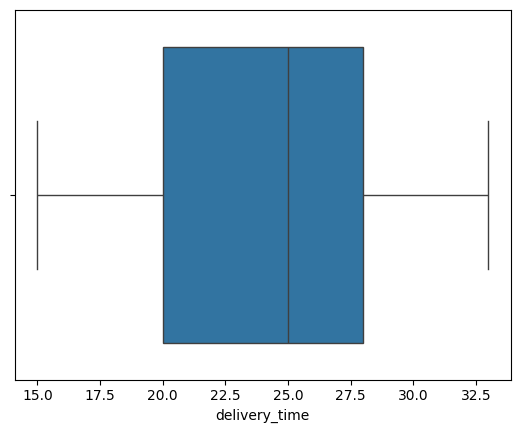

In [ ]:
#violin plot and box plot on the delivery time.
sns.violinplot(data=df, x='delivery_time')
plt.title('Violin Plot of Delivery Time')
plt.show()

sns.boxplot(data=df, x='delivery_time')
plt.show()

- A high frequency of data is concentrated between 20 to 28 minutes.
- The median delivery time is approximately 25 minutes.
- There are no apparent outliers.
- The data exhibits a left-skew.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Group by 'restaurant_name' and count the number of orders for each restaurant
order_counts = df.groupby('restaurant_name').size()

# Sort the counts in descending order to see the restaurants with the most orders
order_counts_sorted = order_counts.sort_values(ascending=False)

# plot Top 5 restaurants ordered most.
order_counts_sorted.head()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations:

Top 5 Restaurants with the number of orders received are as follows.
- Shake Shack                  - 219
- The Meatball Shop            - 132
- Blue Ribbon Sushi            - 119
- Blue Ribbon Fried Chicken    -  96
- Parm                         -  68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter dataframe for orders on weekends
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
weekend_orders['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
- American is the most popular cuisine during week end.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# find the total number of orders and orders that costs above 20.
total_orders = df.shape[0]
orders_above_20 = (df['cost_of_the_order']>20).sum()

# calculate the percentage.
percentage_above_20 = (orders_above_20/ total_orders)*100
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:
- Percentage of orders costing more than 20: 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# using mean() function to calculate the delivery time mean time overall.
df['delivery_time'].mean()

24.161749209694417

#### Observations:
- The mean order delivery time is: 24.16

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# top 3 customers who ordered the most.
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
- The top 3 customer IDs and their respective number of orders are: 52832 (13 orders), 47440 (10 orders), and 83287 (9 orders).

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# HeatMap Analysis (Cost of the order vs Food Preapration Time vs Delivery Time)

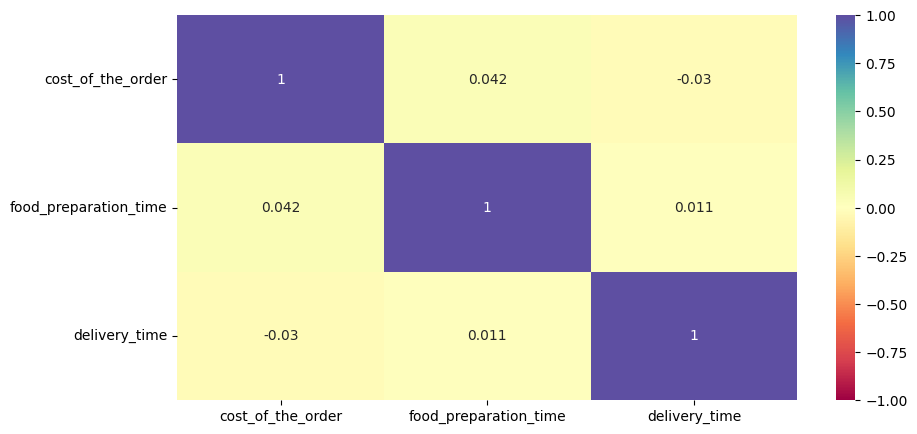

In [ ]:
#heat map on the numerical data.
cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10,5))
sns.heatmap(df[cols].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

- Looks like there is no positive or negative correlation exists between delivery_time, food_preparation_time and cost_of_the_order.

# Pair Plot (Cost of the order vs Food Preparation time vs Delivery Time)

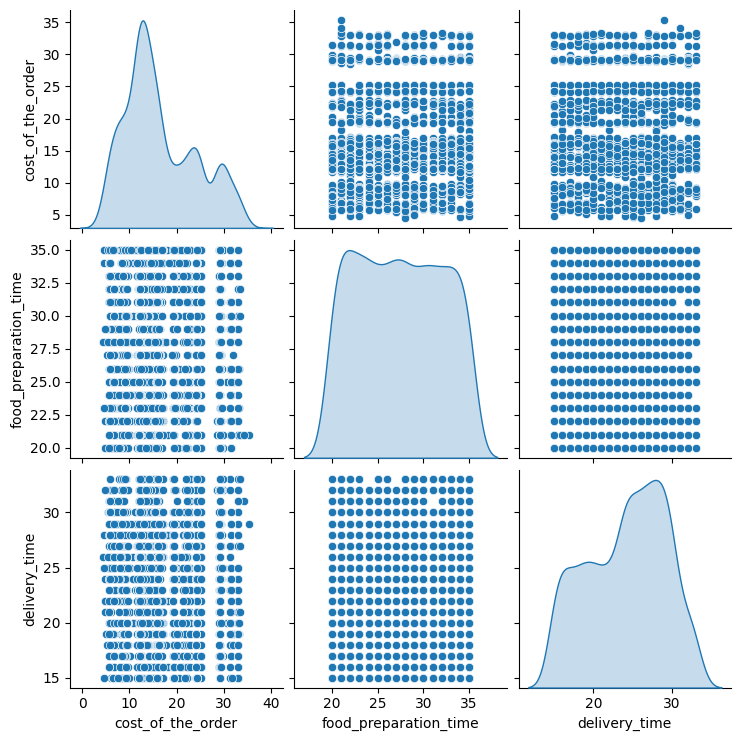

In [ ]:
# pair plot on the numerical data to see the correlation.
sns.pairplot(df, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], diag_kind="kde");

- Not much correlation present between 'cost_of_the_order', 'food_preparation_time', 'delivery_time' three variables

# Scatter Plot (Cost of the Order vs Rating)

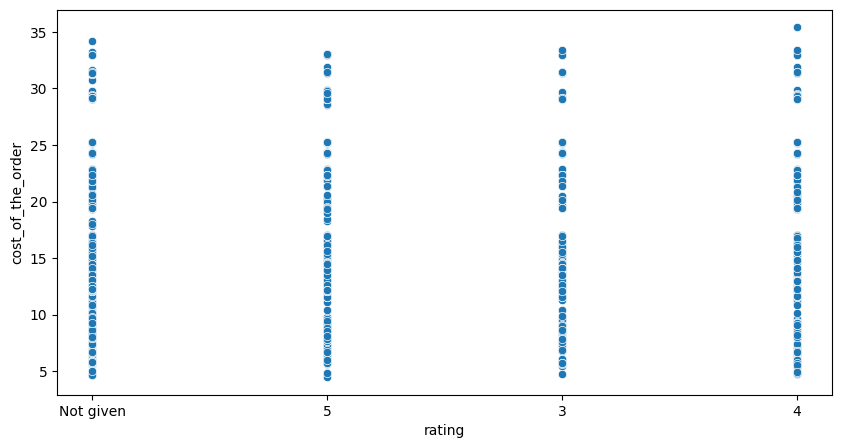

In [ ]:
# scatter plot.
plt.figure(figsize=(10,5))
sns.scatterplot(x='rating', y='cost_of_the_order', data=df)
plt.show()

- Tried to analyze if there is any correlation between the cost and the customer satisfaction. But From the given data, not able to see any specific correlation.

# Line Plot (Rating vs Delivery Time vs Day of the Week)

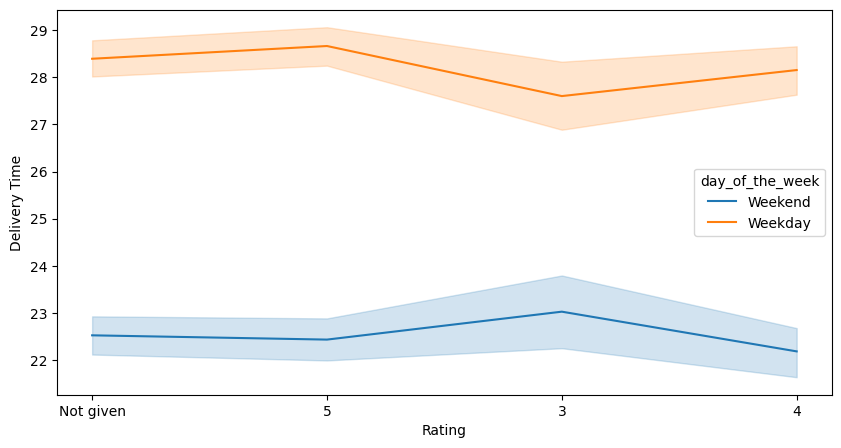

In [ ]:
#line plot
plt.figure(figsize=(10,5))
sns.lineplot(x='rating', y='delivery_time', data=df, hue='day_of_the_week')
plt.ylabel("Delivery Time")
plt.xlabel("Rating")
plt.show()

- week end deliveries are faster than week day delivery.
- All week end deliveries are below average time delivery.
- No correlation between rating and delivery_time.

# Cusine Type vs Cost of the Order vs Day of the week

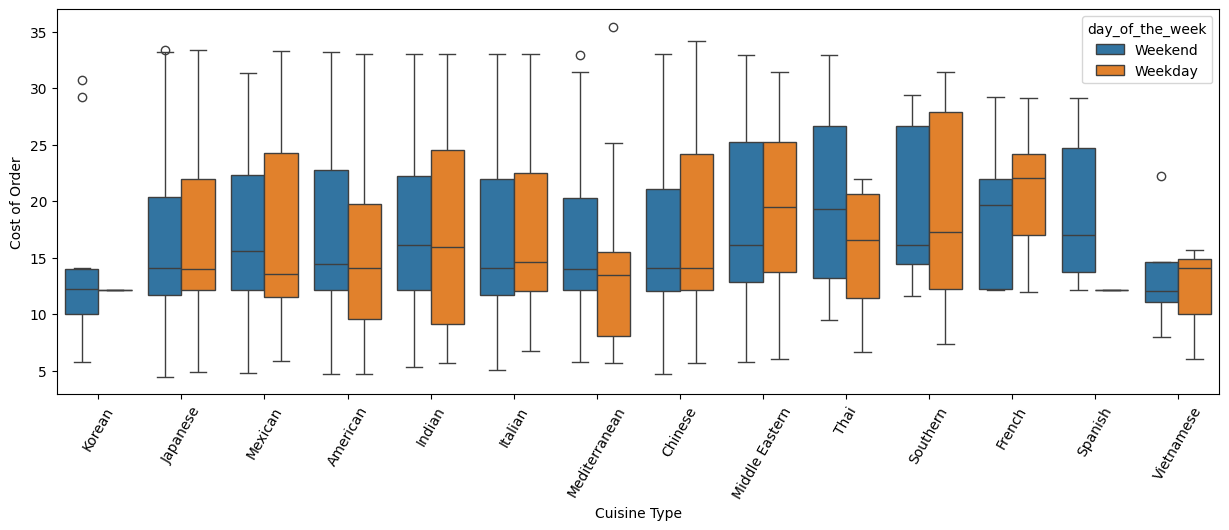

In [ ]:
# boxplot the relationship between cuisine type and cost of order
plt.figure(figsize=(15, 5));
sns.boxplot(x='cuisine_type', y="cost_of_the_order", data=df, hue='day_of_the_week');
plt.xticks(rotation=60, size=10);
plt.ylabel('Cost of Order', size=10);
plt.xlabel('Cuisine Type', size=10);

- Week day orders on Korean and Spanish are very low compared to week end
- Median cost of orders are higher on weekends for Mexican, American, Indian, Medierranean and Thai.
- Japanese and Chinese median cost of orders are approximately same.
- Median cost of orders are higher on weekdays for Italian, Middle Eastern, Southern, French and Vietnamese.
- There are outlier cost orders for Korean, Japanese, Mediterranean and Vietnamese. In that only Mediterranean has the week day outlier.
- Costliest order is from Mediterranean Restaurant.

# Cusine Type vs Restaurant Count

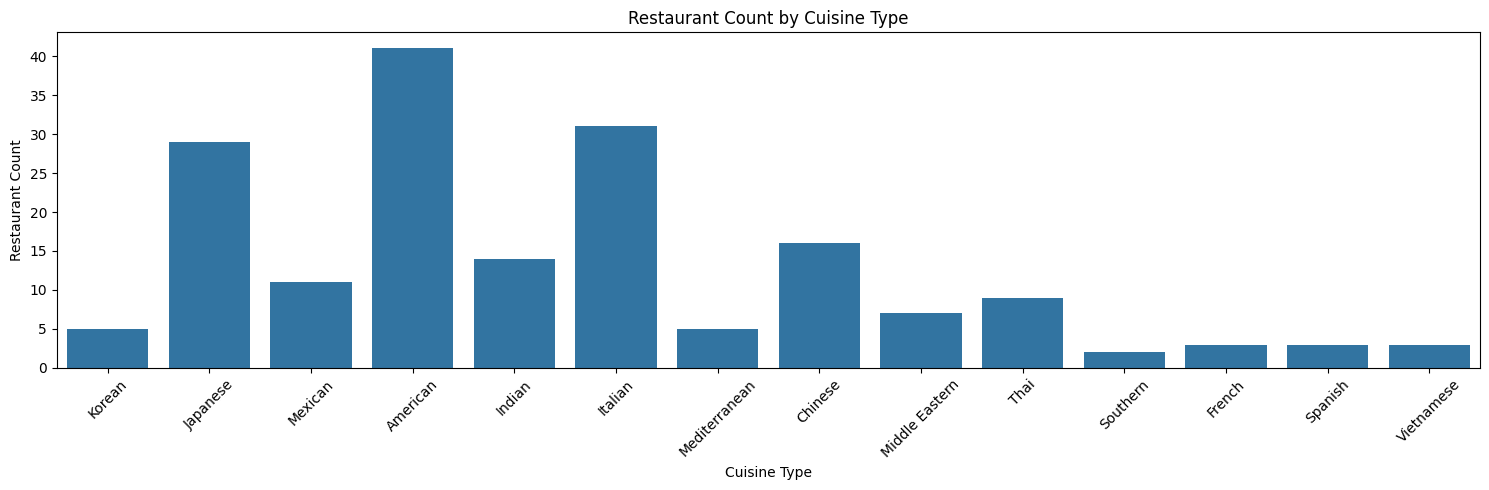

In [ ]:
#bar plot between cusine type and restaurant count
plt.figure(figsize=(15, 5));
df['restaurant_count'] = df.groupby('cuisine_type')['restaurant_name'].transform('nunique')
sns.barplot(x='cuisine_type', y='restaurant_count', data=df.drop_duplicates('cuisine_type'))
plt.title('Restaurant Count by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Restaurant Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Number of American Restaurants are higher, followed by Italian, Japanese, Chinese and Indian.

# Cuisine Type vs Food Preparation Time vs Delivery Time

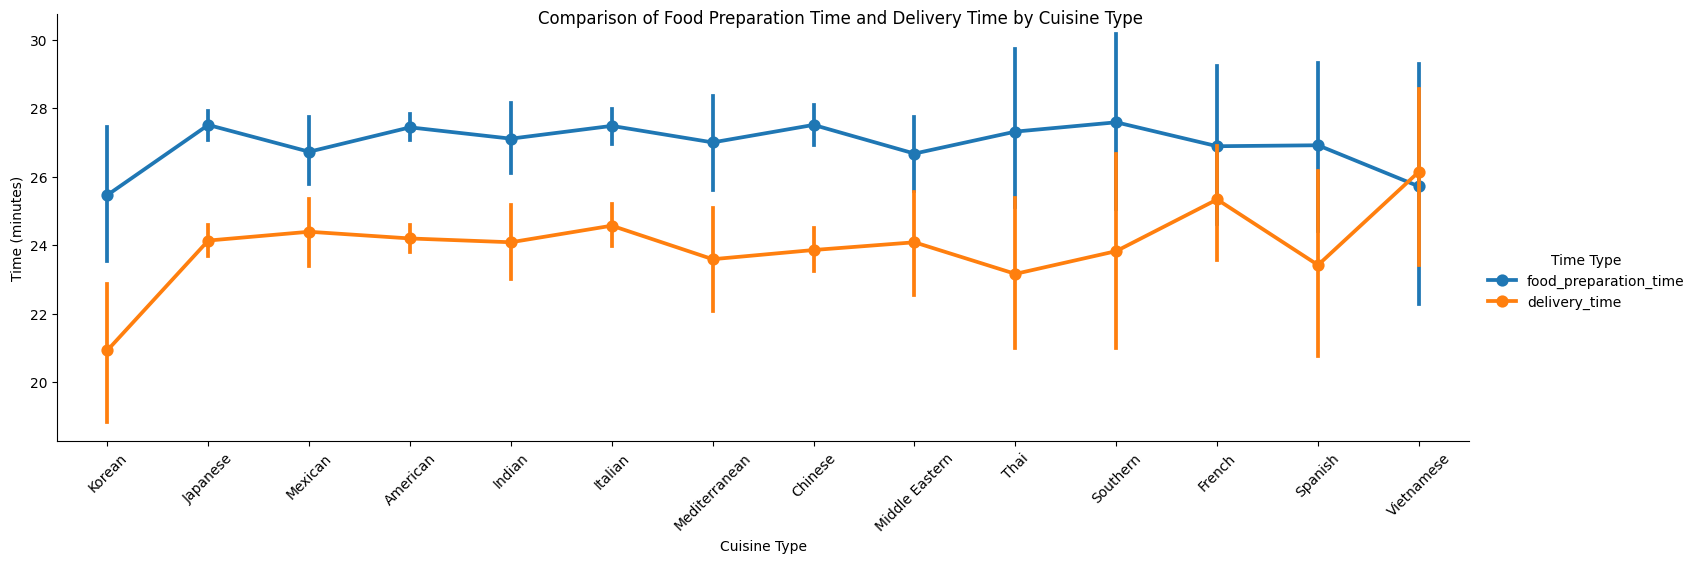

In [ ]:
# melt to combine the food preparation time and delivery time.
df_melted = df.melt(id_vars='cuisine_type', value_vars=['food_preparation_time', 'delivery_time'], var_name='Time Type', value_name='Time')

# Create the catplot
g = sns.catplot(
    data=df_melted,
    x='cuisine_type',
    y='Time',
    hue='Time Type',
    kind='point',
    height=5,
    aspect=3
)

# Rotate the x-axis labels for better readability
g.set_xticklabels(rotation=45)

# sub title, labels and show the plot
g.fig.suptitle('Comparison of Food Preparation Time and Delivery Time by Cuisine Type')
g.set_axis_labels('Cuisine Type', 'Time (minutes)')
plt.show()

- All cusine types food preparation time is higher than the delivery time except vietnamese.
- As per the confidence intervals, American, Japanese have less variability in data while Thai, Southern and Vietnamese have more variability in data.

# Cusine Type vs Rating

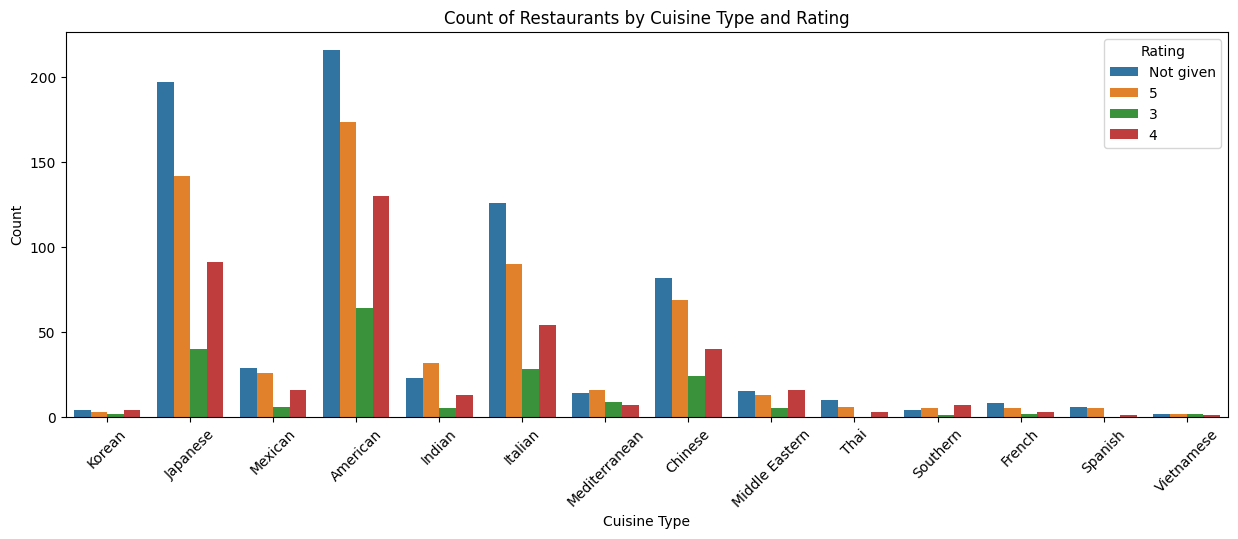

In [ ]:
plt.figure(figsize=(15, 5));
sns.countplot(data=df, x='cuisine_type', hue='rating')
# Set the titles and labels
plt.title('Count of Restaurants by Cuisine Type and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Display the legend
plt.legend(title='Rating')
# Show the plot
plt.show()

- Rating is not correlated with cuisine type and vice versa

# Cost of the order vs Day of the Week vs Rating


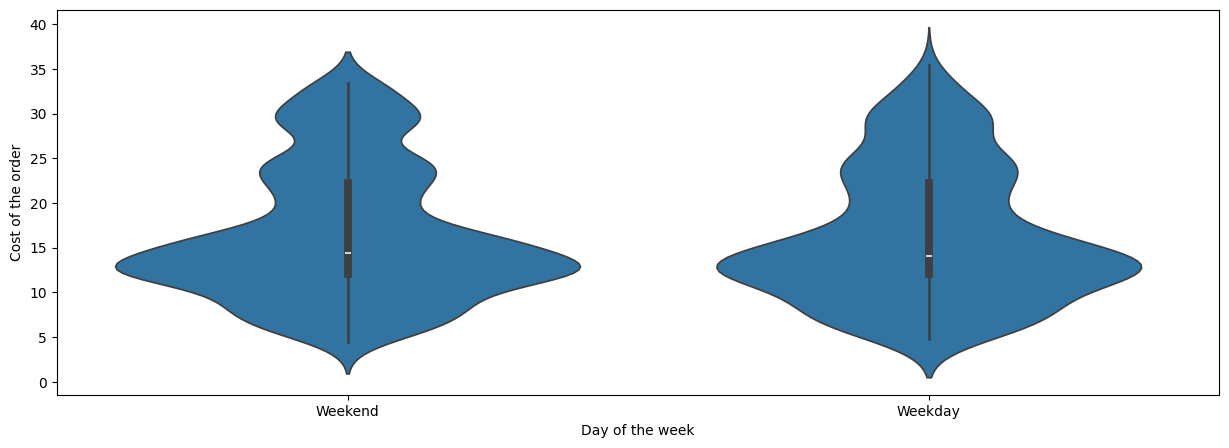

In [8]:
#violin plot
plt.figure(figsize=(15, 5));
sns.violinplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.xlabel('Day of the week')
plt.ylabel('Cost of the order')
plt.show()

- Median week end cost of order is little higher than median week day cost of order.

# Cost of order vs Delivery Time.

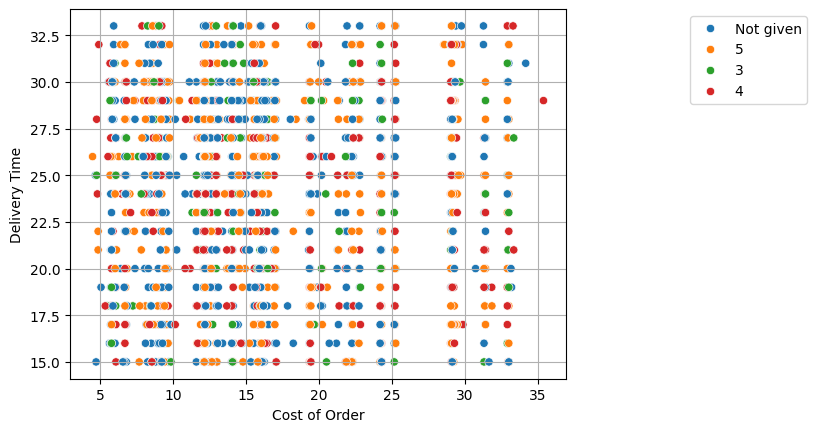

In [ ]:
#Scatter plot
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='rating')
plt.xticks(size=10)
plt.ylabel('Delivery Time')
plt.xlabel('Cost of Order')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.grid(True)
plt.show()

# Rating vs Delivery Time + Preparation Time (Total Time after Order)

<Figure size 1500x500 with 0 Axes>

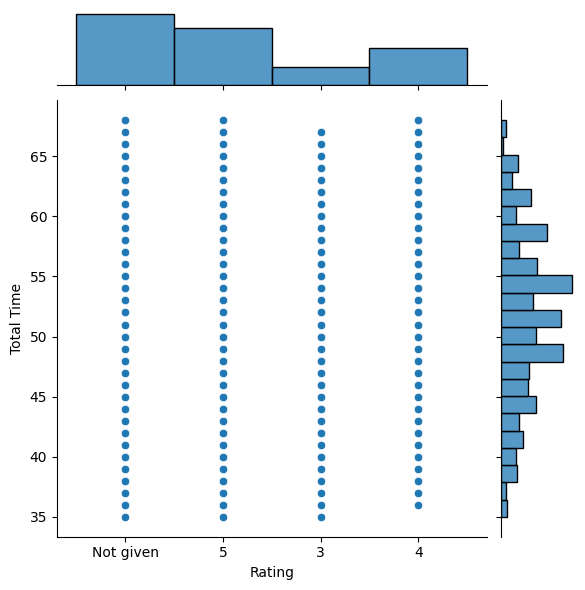

In [27]:
#comparing total time and rating.
plt.figure(figsize=(15, 5));
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

sns.jointplot(x='rating', y='total_time', data=df);
plt.ylabel('Total Time');
plt.xlabel('Rating');

# Most Revenue to Least Revenue

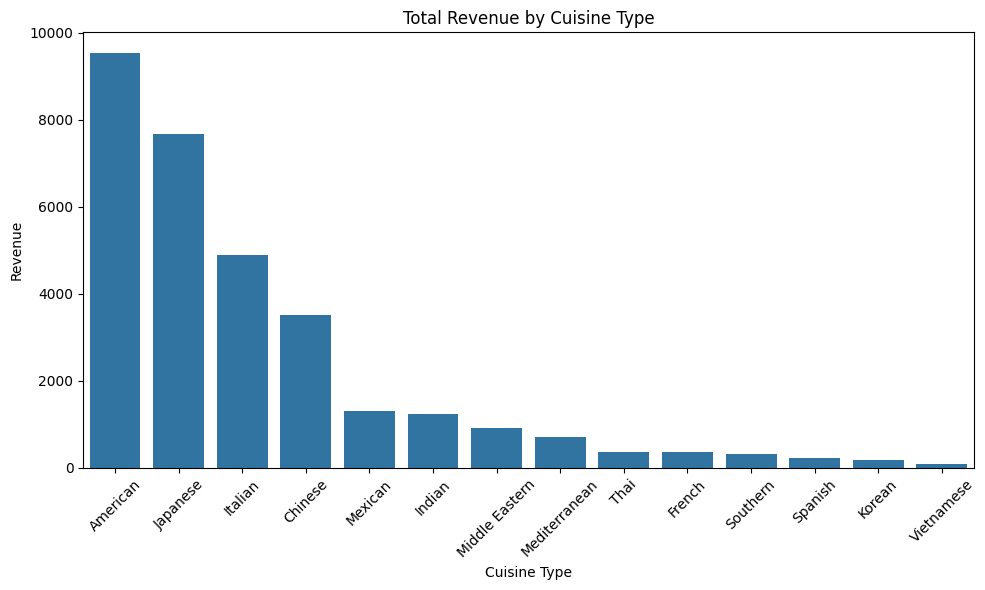

In [ ]:
# Group by 'cuisine_type' and sum 'cost_of_the_order' to get the total revenue
revenue_by_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].sum().reset_index()
# Sort the values by revenue
revenue_by_cuisine_sorted = revenue_by_cuisine.sort_values(by='cost_of_the_order', ascending=False)
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_by_cuisine_sorted, x='cuisine_type', y='cost_of_the_order')
# Set the titles and labels
plt.title('Total Revenue by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Revenue')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

# Top 10 Most Revenue Generated Restaurants

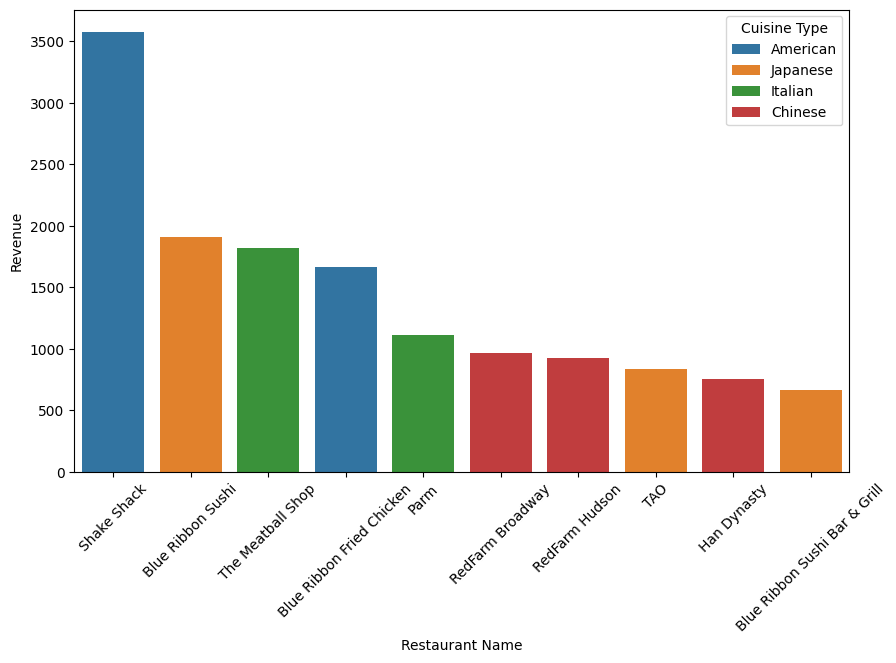

In [ ]:
# Group by 'restaurant_name' and 'cuisine_type', then sum 'cost_of_the_order'
revenue_cuisine = df.groupby(['restaurant_name', 'cuisine_type'])['cost_of_the_order'].sum().reset_index()

# Sort the values by revenue and get the top 10
most_revenue_restaurants = revenue_cuisine.sort_values(by='cost_of_the_order', ascending=False).head(10)

# Now create the bar plot with 'cuisine_type' as the hue
plt.figure(figsize=(10, 6))
sns.barplot(data=most_revenue_restaurants, x='restaurant_name', y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation=45)
plt.xlabel('Restaurant Name')
plt.ylabel('Revenue')
plt.legend(title='Cuisine Type')
plt.show()


# Overall Observations:

- Ratings appear to be independent of delivery time, preparation time, cuisine type, or any other factors.
- There is no discernible correlation between the cost of the order, delivery time, preparation time, and cuisine type.
- The distribution of the variables is even across the board.
- Delivery times tend to be shorter on weekends than on weekdays.
- The restaurant generating the most revenue specializes in American cuisine, which has also led to high revenue generation across this category

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Remove rows that has the rating as 'Not given'
df_rating_present = df[df['rating']!='Not given'].copy()
# Convert the string rating to numeric
df_rating_present.loc[:, 'rating'] = pd.to_numeric(df_rating_present['rating'])
# group by restaurant_name and aggregate the rating.
restaurant_ratings = df_rating_present.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter out the restaurants with a rating count of more than 50 and an average rating greater than 4.
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count']>50) & (restaurant_ratings['mean']>4)]

print(eligible_restaurants)


                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
PROMO OFFER RESTAURANTS
- Blue Ribbon Fried Chicken
- Blue Ribbon Shushi
- Shake Shack
- The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Define a method to calculate the commission.
def calculate_commission(cost):
  if cost>20:
    return round(cost*0.25,2)
  elif cost>5:
    return round(cost*0.15,2)
  else:
    return 0.00

# Apply the function to the cost of the order to find the company revenue through commission
df['commission'] = df['cost_of_the_order'].apply(calculate_commission)

# Calculate the total revenue
print("Total revenue of orders over 20:", df[df['cost_of_the_order']>20]['commission'].sum())
print('Total revenue of orders more than 5 and less than or equal to 20:', df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['commission'].sum())
print('Total revnue:',df['commission'].sum())


Total revenue of orders over 20: 3688.88
Total revenue of orders more than 5 and less than or equal to 20: 2477.62
Total revnue: 6166.5


#### Observations:
- Total revenue of orders over 20: 3688.88
- Total revenue of orders more than 5 and less than or equal to 20: 2477.62
- Total revnue: 6166.5

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# calculate the total time and create a new column
df['total_time'] = df['food_preparation_time']+df['delivery_time']

# Find the orders that takes more than 60 mins.
round((df[df['total_time']>60].shape[0] / df.shape[0])*100,2)

10.54

#### Observations:
- 10.54% of orders have a total delivery time exceeding 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
weekday_mean_delivery_time = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
weekend_mean_delivery_time = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

print('Week day mean delivery time', round(weekday_mean_delivery_time,2))
print('Week end mean delivery time', round(weekend_mean_delivery_time,2))

Week day mean delivery time 28.34
Week end mean delivery time 22.47


#### Observations:
- Weekend mean delivery time is faster, which indicates that deliveries are more efficient during the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- A higher number of ratings are ‘Not given’.
- The top 5 restaurants feature American, Italian, and Japanese cuisine.
- There is no correlation between delivery time, preparation time, cost of the order, and ratings.
- Revenue is higher for orders that are more than 20, compared to orders between 5 and 20.
- Weekend mean delivery times are 20.72% faster than on weekdays.
- A few customers are ordering repeatedly via Foodhub.

### Recommendations:

- Encourage people to start giving ratings to gain more insight into process improvements. Perhaps the ‘Not Given’ option can be eliminated.
- Consider marketing American, Italian, and Japanese restaurants for increased revenue.
- Create a loyalty program for customers who order repeatedly.
- Analyze the restaurants that are receiving lower ratings and provide feedback on how to improve their ratings.
- Identify the root cause of orders that take longer delivery times or food preparation times and figure out a way to reduce these times for quicker delivery.

---